<a href="https://colab.research.google.com/github/a-nechaeva/AppliedAI/blob/main/%D0%9F%D1%80_1__%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%9D%D0%B5%D1%87%D0%B0%D0%B5%D0%B2%D0%B0_%D0%90%D0%BD%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическое задание № 1. Классификация


**Работу выполнила:**

Нечаева Анна Анатольевна, 312298

# Распознавание активности человека на основе данных с мобильных сенсоров

Необходимо по данным с мобильных сенсоров при помощи прикладных алгоритмов машинного обучения предсказать активность человека по шести классам движений:
* Движется по прямой
* Движется вверх (например, движение по лестнице вверх)
* Движется вниз (например, движение по лестнице вниз)
* Сидит
* Стоит
* Лежит

## Сведения о наборе данных
Набор данных содержит записи датчиков со сматфонов (акселерометр и гироскоп с частотой дискретизации 50 Гц) от 30 участников, выполняющих следующие действия: ходьба, ходьба по лестнице, ходьба по лестнице, сидение, стояние и лежание. Данные были предварительно обработаны при помощи фильтров шума. Набор данных представлен Хорхе Л. Рейес-Ортисом.

Признаки были извлечены из 3-х осевых необработанных сигналов акселерометра и гироскопа tAcc-XYZ и tGyro-XYZ. Эти сигналы были сняты с постоянной частотой 50 Гц. Затем были отфильтрованны с помощью медианного фильтра и низкочастотного фильтра Баттерворта 3-го порядка с частотой 20 Гц для удаления шумов. Аналогичным образом сигнал ускорения был разделен на сигналы ускорения тела и гравитации (`tBodyAcc-XYZ` и `tGravityAcc-XYZ`) с помощью другого низкочастотного фильтра Баттерворта с угловой частотой 0,3 Гц. Линейное ускорение тела и угловая скорость были использованы для получения сигналов "рывка" — (`tBodyAccJerk-XYZ` и `tBodyGyroJerk-XYZ`). Также величина этих трехмерных сигналов была расчитана с использованием евклидовой нормы — (`tBodyAccMag`, `tGravityAccMag`, `tBodyAccJerkMag`, `tBodyGyroMag`, `tBodyGyroJerkMag`).

Наконец, к некоторым из этих сигналов было применено быстрое преобразование Фурье (БПФ), в результате чего получились `fBodyAcc-XYZ`, `fBodyAccJerk-XYZ`, `fBodyGyro-XYZ`, `fBodyAccJerkMag`, `fBodyGyroMag`, `fBodyGyroJerkMag`. (Обратите внимание на "f" для обозначения сигналов в частотной области).

Набор переменных, которые были оценены по этим сигналам, следующий:
* mean(): Среднее значение
* std(): Стандартное отклонение
* mad(): Среднее абсолютное отклонение
* max(): Наибольшее значение в массиве
* min(): Наименьшее значение в массиве
* sma(): Область величины сигнала
* energy(): Мера энергии. Сумма квадратов, деленная на количество значений.
* iqr(): Интерквартильный размах
* entropy(): Энтропия сигнала
* arCoeff(): Коэффициенты авторегрессии с порядком Burg, равным 4
* correlation(): коэффициент корреляции между двумя сигналами
* maxInds(): индекс частотной составляющей с наибольшей величиной
* meanFreq(): средневзвешенное значение частотных компонент для получения средней частоты
* skewness(): перекос сигнала в частотной области
* kurtosis(): эксцесс сигнала в частотной области
* bandsEnergy(): Энергия частотного интервала в пределах 64 бинов БПФ каждого окна.
* angle(): Угол между векторами.
## Импорт библиотек
Первым делом импортируем необходимые библиотеки для работы с данными:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [56]:
import os
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Считываем набор данных

В прикладных задачах машинного обучения очень важен процесс извлечения признаков (feature extraction), в ходе которого данные интерпретируются в информативные признаки. Также этот процесс может называться проектирование признаков (feature engineering), это весьма трудоемкая и творческая задача. В рамках работы мы опустим эту часть и воспользуемся предобработанными данными.

In [57]:
def read_data(path, filename):
    return pd.read_csv(os.path.join(path, filename))

df = read_data('drive/MyDrive/AAI/lab_1_data', 'train.csv')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Теперь, загрузим полный набор данных и сохранить его под следующими четырьмя переменными:

* `train_X`: признаки, используемые для обучения модели
* `train_y`: метки, используемые для обучения модели
* `test_X`: признаки, используемые для проверки модели
* `test_y`: метки, используемые для проверки модели

In [58]:
def load_dataset(label_dict):
    train_X = read_data('drive/MyDrive/AAI/lab_1_data', 'train.csv').values[:,:-2]
    train_y = read_data('drive/MyDrive/AAI/lab_1_data', 'train.csv')['Activity']
    train_y = train_y.map(label_dict).values
    test_X = read_data('drive/MyDrive/AAI/lab_1_data', 'test.csv').values[:,:-2]
    test_y = read_data('drive/MyDrive/AAI/lab_1_data', 'test.csv')
    test_y = test_y['Activity'].map(label_dict).values
    return(train_X, train_y, test_X, test_y)
label_dict = {'WALKING':0, 'WALKING_UPSTAIRS':1, 'WALKING_DOWNSTAIRS':2, 'SITTING':3, 'STANDING':4, 'LAYING':5}
train_X, train_y, test_X, test_y = load_dataset(label_dict)

## Выбор модели

Импортируйте выбранную вами модель из библиотеки `sklearn` и инициализируйте её в объект `model`:

Также необходимо выбрать **несколько** моделей ML для сравнения полученных результатов.

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC


# основная модель обучения -- логистическая регрессия
model = LogisticRegression()

# модели для сравнения полученных результатов
model_kn = KNeighborsClassifier()
model_t = DecisionTreeClassifier()
model_svc = LinearSVC()

### Основная модель и её гиперпараметры

***
В качестве основной модели для обучения была выбрана **Логистическая регрессия**.

В библиотеке *sklearn* она реализована в виде класса с параметрами по умолчанию:

`class sklearn.linear_model.LogisticRegression(penalty = 'l2', *, dual = False, tol = 0.0001, C = 1.0, fit_intercept = True, intercept_scaling = 1, class_weight = None, random_state = None, solver = 'lbfgs', max_iter = 100, multi_class = 'deprecated', verbose = 0, warm_start = False, n_jobs = None, l1_ratio = None)`


***
**💡Гиперпараметры:**

`Penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'`

Penalty term (штрафной термин) — это элемент в математических моделях и алгоритмах оптимизации, который добавляется к целевой функции для наказания или отдаления от нежелательных решений. Его основная цель — предотвратить переобучение или обеспечить выполнение определённых ограничений в оптимизационной задаче.

Штрафные термины часто используются в регуляризации моделей машинного обучения, таких как линейная регрессия, для регулирования сложности модели и улучшения её обобщающей способности. Они могут принимать различные формы, в зависимости от поставленной задачи, такие как L1 или L2 регуляризация (также известные как Lasso и Ridge).

*   `None`: никакой штраф не назначен;
*   `'l2'`: добавляет штраф 'l2', значение по умолчанию, регуляризация добавляет к функции потерь сумму квадратов весов модели, умноженную на коэффициент регуляризации. Это поощряет модель сохранять небольшие значения весов, тем самым уменьшая риск переобучения;
*   `'l1'`: добавляет штраф 'l1', регуляризация добавляет к функции потерь сумму абсолютных значений весов модели, что может привести к обнулению некоторых весов и, таким образом, к получению разреженной модели;
*   `'elasticnet'`: добавляет оба штрафа и 'l2', и 'l1';

`C: float, defalt=1.0`

Значение, обратное величине регуляризации; должно быть положительным с плавающей точкой. Как и в методе опорных векторов, меньшие значения указывают на более сильную регуляризацию.


`solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'`

Алгоритм, который будет использоваться в задаче оптимизации. По умолчанию используется значение `'lbfgs'`. Чтобы выбрать решатель, вам может потребоваться рассмотреть следующие аспекты:



*    Для небольших наборов данных хорошим выбором является `'liblinear'`, в то время как `'sag'` и `'saga'` работают быстрее для больших наборов данных;

*    Для задач с несколькими классами только `'newton-cg'`, `'sag'`, `'saga'` и `'lbfgs'` обрабатывают многочленные потери;

*    `'liblinear'` и `'newton-cholesky'` по умолчанию могут обрабатывать только двоичную классификацию.  Чтобы применить схему "один против другого" для настройки мультикласса, можно обернуть ее с помощью `OneVsRestClassifier`.

*    `'newton-cholesky'` - хороший выбор для `n_samples >> n_features`, особенно для категориальных объектов с однократной кодировкой и редкими категориями. Имейте в виду, что использование памяти этим решателем имеет квадратичную зависимость от `n_features`, поскольку он явно вычисляет матрицу Гесса.

`max_iter: int, default=100`

Максимальное количество итераций, необходимых для сходимости решателей.

`tol: float, default=1e-4`

Параметр для определения сходимости. Модель остановится, если изменение функции потерь станет меньше этого значения.
***

**💡Преимущества использования Логистической регрессии**

*   Логистическая регрессия не предполагает нормальности распределения признаков, что делает её более гибкой по сравнению с другими моделями;

*   хотя изначально предназначена для бинарной классификации, логистическая регрессия может быть расширена для многоклассовых задач с использованием стратегий, таких как `One-vs-Rest`;

*   использование методов регуляризации (`L1`, `L2`) позволяет контролировать сложность модели и улучшать ее обобщающую способность.
***


### Дополнительные модели для обучения

#### KNN


***
`KNeighborsClassifier` $-$ это алгоритм классификации, основанный на методе k ближайших соседей.  

`class sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)`
***
💡**Гиперпараметры**

 `n_neighbors: int, default=5`

 Количество соседей, которые будут использоваться для принятия решения о классе нового образца. Увеличение значения может привести к более смазанным выводам, в то время как уменьшение может сделать модель более чувствительной к шуму.

`weights: {'uniform', 'distance'}, callable or None, default='uniform'`

Определяет распределение весов соседей:
*   `'uniform'` равнозначные веса для всех соседей, по умолчанию;
*   `'distance'` веса определяются обратно пропорционально расстоянию до соседей;

`algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'`

Алгоритм, используемый для вычисления ближайших соседей. Возможные значения:
*   `'auto'` выбор наилучшего алгоритма, основанного на данных;
*   `'balltree'` использует структуру данных `BallTree`;
*   `'kdtree'` использует структуру данных `KD-tree`;
*   `'brute'` брутфорс, оценка всех расстояний

`leaf_size: int, default=30`

Параметр, используемый для алгоритмов `BallTree` и `KDTree`, который влияет на скорость построения дерева и последующие операции поиска. Значение по умолчанию — 30.

`p: float, default=2`

Параметр, использующийся в метриках minkowski и определяющий, какую норму использовать. Если `p = 1`, используется манхэттенское расстояние (`L1`-норма), если `p = 2`, то евклидово расстояние (`L2`-норма).

`metric: str or callable, default='minkowski'`

Мера расстояния, используемая для определения "близости" соседей. По умолчанию используется `'minkowski'`.
***


#### DTC

***
`DecisionTreeClassifier` $-$ это класс, способный выполнять многоклассовую классификацию на наборе данных. В случае, если существует несколько классов с одинаковой и наибольшей вероятностью, классификатор предскажет класс с наименьшим индексом среди этих классов.

`class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)`

***
💡**Гиперпараметры**

`criterion: {“gini”, “entropy”, “log_loss”}, default=”gini”`

Критерий, используемый для оценки качества разбиения.

`splitter: {“best”, “random”}, default=”best”`

Стратегия, используемая для выбора разделения на каждом узле. Поддерживаются стратегии `“best”` для выбора наилучшего разделения и `“random”` для выбора наилучшего случайного разделения.

`max_depth: int, default=None`

Максимальная глубина дерева. Если `None`, то узлы расширяются до тех пор, пока все листья не станут чистыми или пока все листья не будут содержать меньше чем `min_samples_split` выборок.

`min_samples_split: int or float, default=2`

Минимальное количество выборок, необходимое для разделения внутреннего узла:

*   если int, то рассматривайте `min_samples_split` как минимальное число;

*   если float, то `min_samples_split` - это дробь, а `ceil(min_samples_split * n_samples)` - минимальное количество выборок для каждого разделения.

`min_samples_leaf: int or float, default=1`

Минимальное количество выборок, необходимое для того, чтобы они находились в конечном узле. Точка разделения на любой глубине будет учитываться только в том случае, если она оставляет как минимум `min_samples_leaf` обучающих выборок в каждой левой и правой ветвях. Это может привести к сглаживанию модели, особенно при регрессии.

*   Если `int`, то учитывайте `min_samples_leaf` как минимальное число.

*   Если `float`, то `min_samples_leaf` - это дробь, а `ceil(min_samples_leaf * n_samples)` - минимальное количество выборок для каждого узла.

`max_features: int, float or {“sqrt”, “log2”}, default=None`

Количество функций, которые следует учитывать при поиске наилучшего разделения:

*   если `int`, то учитывайте функции `max_features` при каждом разделении;

*   если `float`, то `max_features` - это дробь, и при каждом разделении учитываются функции `max(1, int(max_features * n_features_in_))`;

*   если `“sqrt”`, то `max_features=sqrt(n_features)`;

*   если `“log2”`, то `max_features=log2(n_features)`;

*   если `None`, то `max_features=n_features`.

Поиск разделения не прекращается до тех пор, пока не будет найдено хотя бы одно допустимое разделение образцов узлов, даже если для этого требуется эффективно проверить больше объектов, чем `max_features`.

`random_state: int, RandomState instance or None, default=None`

Управляет случайностью оценки. Объекты всегда переставляются случайным образом при каждом разбиении, даже если для параметра `splitter` задано значение "наилучший". Когда `max_features < n_features`, алгоритм будет выбирать `max_features` случайным образом при каждом разбиении, прежде чем найти наилучшее разбиение среди них. Но наилучшее найденное разбиение может отличаться в разных прогонах, даже если `max_features=n_features`. Это происходит в том случае, если улучшение критерия одинаково для нескольких разбиений и одно разбиение должно быть выбрано случайным образом. Чтобы получить детерминированное поведение во время подбора, значение `random_state` должно быть зафиксировано в виде целого числа.

`max_leaf_nodes: int, default=None`

Максимальное количество листовых узлов. Если указано, дерево будет ограничено этим количеством. В случае `None` количество конечных узлов неограниченно.

`class_weight: dict, list of dict or “balanced”, default=None`

Вес классов. Позволяет учитывать несбалансированные классы. Значение может быть `“balanced”` или словарем вида `{класс: вес}`. Если `None`, то все классы имеют вес один.

***

#### SVM

***
`LinearSVC`— это класс в библиотеке `scikit-learn`, который реализует метод опорных векторов (`SVM`) для линейной классификации. Он используется для решения задач бинарной или многоклассовой классификации, когда данные можно разделить с помощью линейной границы.

- Подходит для больших наборов данных.
- Эффективен при большом количестве признаков.
- Поддерживает регуляризацию, что помогает избежать переобучения.

`class sklearn.svm.LinearSVC(penalty='l2', loss='squared_hinge', *, dual='auto', tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)`

***

💡**Гиперпараметры**

`penalty: {‘l1’, ‘l2’}, default=’l2’`

Тип регуляризации. Может принимать значения `'l1'` или `'l2'`. `'l2'` — это более распространенный вариант.


`loss: {‘hinge’, ‘squared_hinge’}, default=’squared_hinge’`

Определяет функцию потерь. `‘hinge’` - это стандартная потеря `SVM` (используемая, например, классом `SVC`), в то время как `‘squared_hinge’` - это квадрат потери шарнира. Комбинация `penalty='l1'` и `loss='hinge'` не поддерживается.

`tol: float, default=1e-4`

Критерий останова.

`C: float, default=1.0`

Параметр регуляризации. Сила регуляризации обратно пропорциональна `C`. Должна быть строго положительной.

`multi_class: {‘ovr’, ‘crammer_singer’}, default=’ovr’`

Определяет стратегию для нескольких классов, если y содержит более двух классов. `"ovr"` обучает `n` классов классификаторам "один против остальных", в то время как `"crammer_singer"` оптимизирует общую цель для всех классов. Хотя `crammer_singer` интересен с теоретической точки зрения, поскольку он непротиворечив, он редко используется на практике, поскольку редко приводит к повышению точности и является более дорогостоящим в вычислениях. Если выбрано значение `"crammer_singer"`, опции "loss", "penalty" и "dual" будут проигнорированы.

`class_weight: dict or ‘balanced’, default=None`

Вес классов. Позволяет учитывать несбалансированные классы. Значение может быть `“balanced”` или словарем вида `{класс: вес}`. Если `None`, то все классы имеют вес один.






## Обучение модели

Обучите модель, используя признаки из обучающего набора (`train_X`) и метки в качестве базовой истины (`train_y`).

In [60]:
model.fit(train_X, train_y)

model_kn.fit(train_X, train_y)

model_t.fit(train_X, train_y)

model_svc.fit(train_X, train_y)

LinearSVC()

## Оценка модели
Используйте обученную модель для прогнозирования активности движения, используя признаки из тестового набора (`test_X`). Прогнозы сохраните в списке `yhat`.

In [61]:
yhat = model.predict(test_X)

yhat_kn = model_kn.predict(test_X)

yhat_t = model_t.predict(test_X)

yhat_svc = model_svc.predict(test_X)

In [62]:
from sklearn.metrics import classification_report
target_names = ['Walking', 'Walking Upstairs', 'Walking Downstairs', 'Sitting', 'Standing', 'Laying']

models_list = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'LinearSVC']

print('\u001b[34;1m ', models_list[0], '  \u001b[0m')
print(classification_report(test_y, yhat, target_names=target_names))
print('\u001b[34;1m ', models_list[1], ' \u001b[0m')
print(classification_report(test_y, yhat_kn, target_names=target_names))
print('\u001b[34;1m ', models_list[2], ' \u001b[0m')
print(classification_report(test_y, yhat_t, target_names=target_names))
print('\u001b[34;1m ', models_list[3], ' \u001b[0m')
print(classification_report(test_y, yhat_svc, target_names=target_names))

  LogisticRegression   
                    precision    recall  f1-score   support

           Walking       0.94      0.99      0.97       496
  Walking Upstairs       0.97      0.94      0.95       471
Walking Downstairs       0.99      0.96      0.98       420
           Sitting       0.96      0.88      0.92       491
          Standing       0.90      0.97      0.93       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

  KNeighborsClassifier  
                    precision    recall  f1-score   support

           Walking       0.85      0.98      0.91       496
  Walking Upstairs       0.89      0.90      0.90       471
Walking Downstairs       0.95      0.79      0.86       420
           Sitting       0.91      0.79      0.85       491
          Standing       0.83      0.93      0.

## Сравнение результатов

### 💡Сравнение результатов с гиперпараметрами по умолчанию


***
Сравнивать будем показатель `f1-score`, так как он учитывает и ложноположительные и ложноотрицательные результаты.

*   Положение, когда человек лежит все модели идентифицируют практически идеально, `f1-score` во всех рассмотренных случаях равен 1. Так происходит, потому что объекты класса `Laying` сильно похожи между собой и гораздо сильнее отличаются от объектов других классов.

*   По всем остальным положениям тела в пространстве наилучшие, близкие к 1 результаты были получены при использовании моделей 'Логистическая регрессия' и  'Метод опорных векторов'. Обе модели отличаются гибкостью и эффективностью в задачах многоклассовой классификации с большими наборами признаков объектов классов.

*   Метод 'K ближайших соседей' оказался немного эффективнее 'Дерева принятий решений', но обе модели уступают другим. Работа метода 'K ближайших соседей' сильно зависит от правильного выбора значения `k`. Слишком большое значение может привести к более смазанным выводам, в то время как слишком маленькое может сделать модель более чувствительной к шуму. Поэтому, предположим, что при более точной настройке гиперпараметра `k` можно добиться лучших значений.
***

Для визуализации результатов воспользуемся матрицей ошибок (`confusion matrix`). Матрица ошибок используется с целью сопоставления предсказаний и реальности в Data Science.

В библиотеке `sklearn` реализованна в виде следующего класса:

`class sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix, *, display_labels=None)`
***

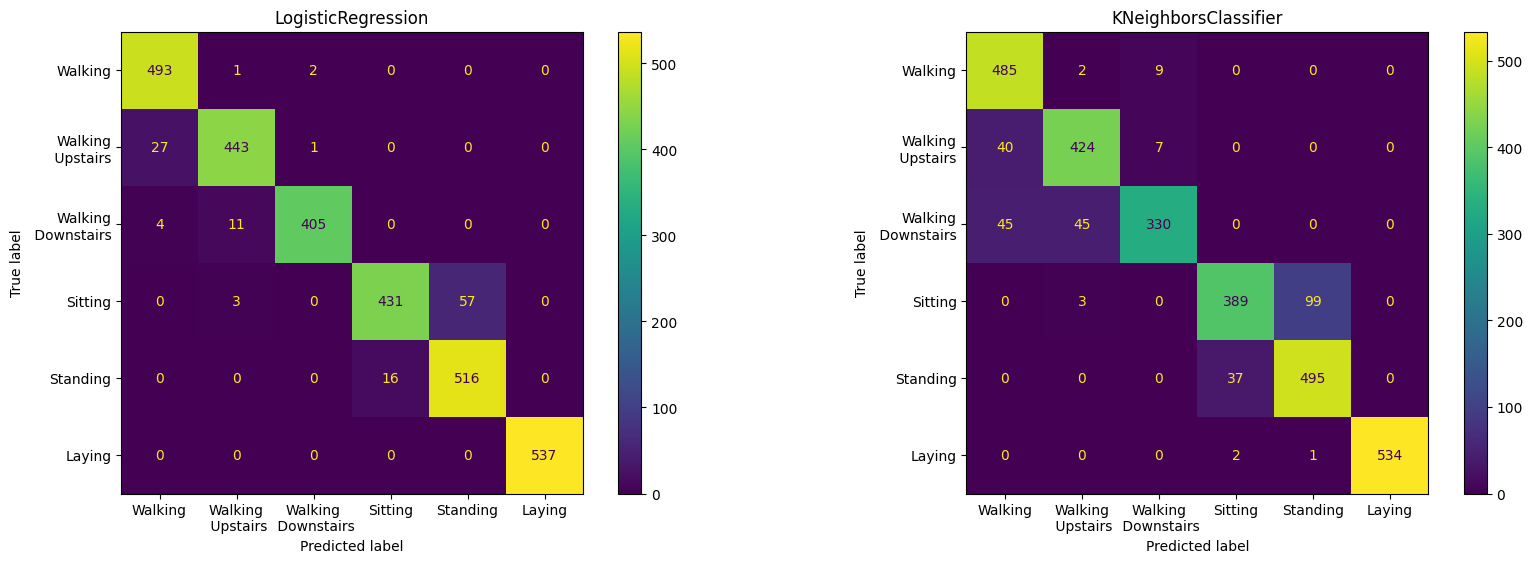

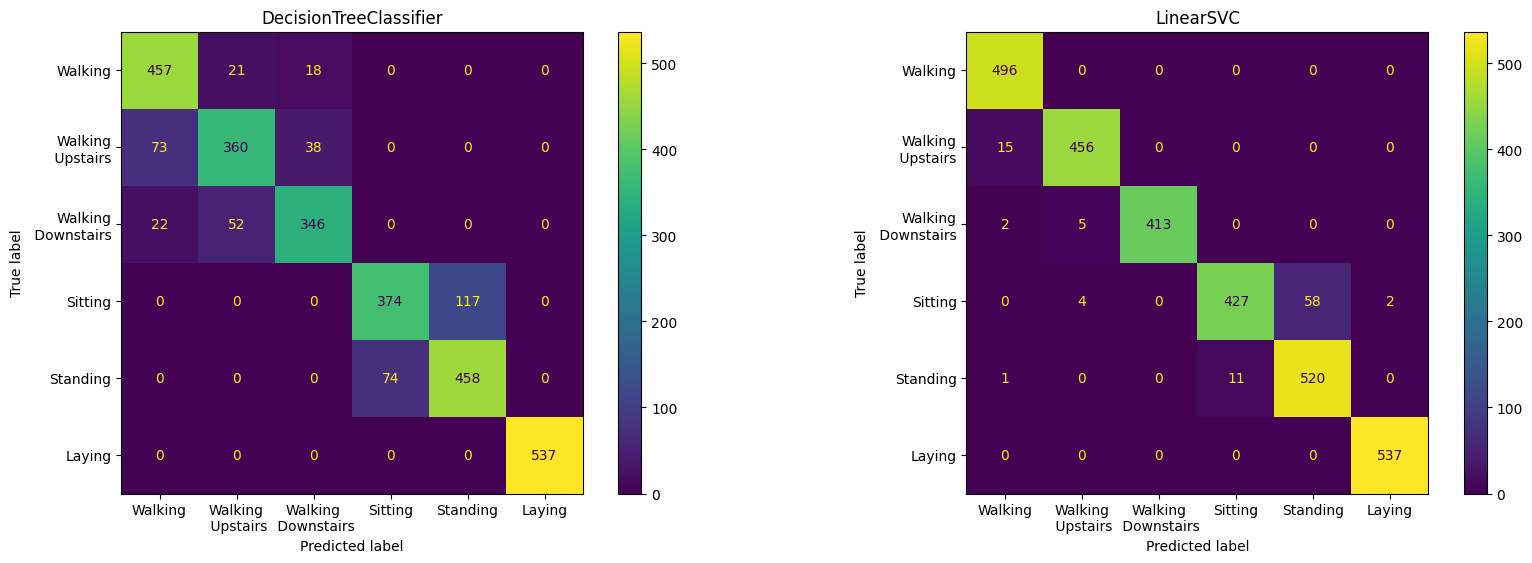

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics as mtrx

target_names_up = ['Walking', 'Walking\n Upstairs', 'Walking\n Downstairs', 'Sitting', 'Standing', 'Laying']

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

for i in range(2):
  ax[i].set_title(models_list[i])


ConfusionMatrixDisplay(confusion_matrix=mtrx.confusion_matrix(test_y, yhat), display_labels=target_names_up,).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=mtrx.confusion_matrix(test_y, yhat_kn), display_labels=target_names_up,).plot(ax=ax[1])

plt.show()


fig, ax = plt.subplots(1, 2, figsize=(20, 6))

for i in range(2):
  ax[i].set_title(models_list[i + 2])


ConfusionMatrixDisplay(confusion_matrix=mtrx.confusion_matrix(test_y, yhat_t), display_labels=target_names_up,).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=mtrx.confusion_matrix(test_y, yhat_svc), display_labels=target_names_up,).plot(ax=ax[1])


plt.show()





### 💡 Сравнение при изменении гиперпараметров для моделей

***
Для каждой модели исследуем влияние одного из гиперпараметров на эффективность обучения.
***

#### 💡 Логистическая регрессия

***
`C: float, defalt=1.0`

Значение, обратное величине регуляризации; должно быть положительным с плавающей точкой. Как и в методе опорных векторов, меньшие значения указывают на более сильную регуляризацию.
***

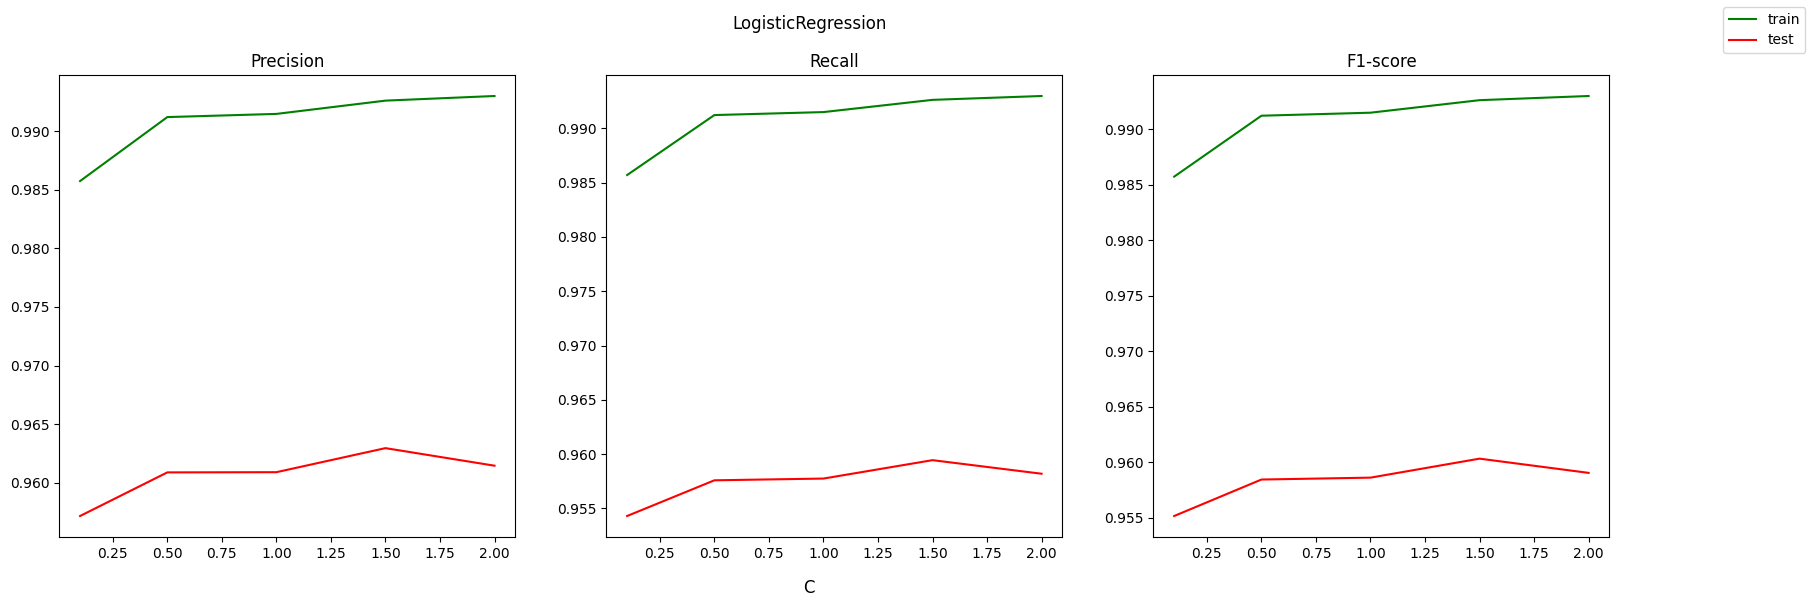

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score

lr_mtrx = ['Precision', 'Recall', 'F1-score']

c_arr = [0.1, 0.5, 1, 1.5, 2]

lr_prec_tr = [0, 0, 0, 0, 0]
lr_prec_ts = [0, 0, 0, 0, 0]

lr_rec_tr = [0, 0, 0, 0, 0]
lr_rec_ts = [0, 0, 0, 0, 0]

lr_f1_tr = [0, 0, 0, 0, 0]
lr_f1_ts = [0, 0, 0, 0, 0]


for i in range(5):

  lr = LogisticRegression(C=c_arr[i])
  lr.fit(train_X, train_y)

  lr_pred_tr = lr.predict(train_X)
  lr_pred_ts = lr.predict(test_X)

  lr_prec_tr[i] = precision_score(y_pred=lr_pred_tr, y_true=train_y, average='macro')
  lr_prec_ts[i] = precision_score(y_pred=lr_pred_ts, y_true=test_y, average='macro')

  lr_rec_tr[i] = recall_score(y_pred=lr_pred_tr, y_true=train_y, average='macro')
  lr_rec_ts[i] = recall_score(y_pred=lr_pred_ts, y_true=test_y, average='macro')

  lr_f1_tr[i] = f1_score(y_pred=lr_pred_tr, y_true=train_y, average='macro')
  lr_f1_ts[i] = f1_score(y_pred=lr_pred_ts, y_true=test_y, average='macro')


fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].set_title(lr_mtrx[0])
ax[0].plot(c_arr, lr_prec_tr, 'g')
ax[0].plot(c_arr, lr_prec_ts, 'r')

ax[1].set_title(lr_mtrx[1])
ax[1].plot(c_arr, lr_rec_tr, 'g')
ax[1].plot(c_arr, lr_rec_ts, 'r')

ax[2].set_title(lr_mtrx[2])
ax[2].plot(c_arr, lr_f1_tr, 'g')
ax[2].plot(c_arr, lr_f1_ts, 'r')

fig.suptitle('LogisticRegression')
fig.supxlabel('C')
fig.legend(['train', 'test'])
plt.show()





***
⚡ Заметим, что оптимальным значением гиперпараметра является `C=1.5`.
***

#### 💡 Метод К ближайших соседей

***
`n_neighbors: int, default=5`

 Количество соседей, которые будут использоваться для принятия решения о классе нового образца. Увеличение значения может привести к более смазанным выводам, в то время как уменьшение может сделать модель более чувствительной к шуму.
***

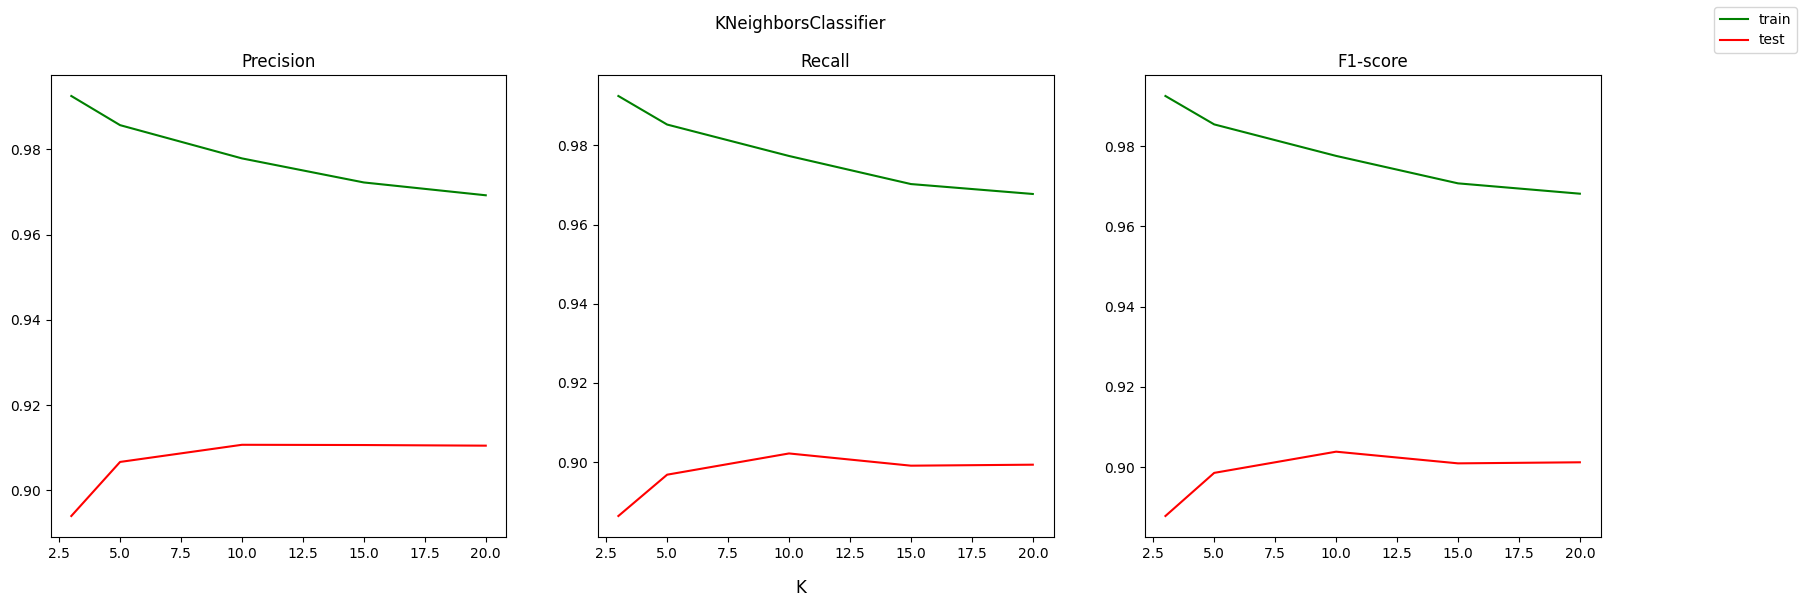

In [65]:
kn_mtrx = ['Precision', 'Recall', 'F1-score']

k_arr = [3, 5, 10, 15, 20]

k_prec_tr = [0, 0, 0, 0, 0]
k_prec_ts = [0, 0, 0, 0, 0]

k_rec_tr = [0, 0, 0, 0, 0]
k_rec_ts = [0, 0, 0, 0, 0]

k_f1_tr = [0, 0, 0, 0, 0]
k_f1_ts = [0, 0, 0, 0, 0]


for i in range(5):

  kn = KNeighborsClassifier(n_neighbors=k_arr[i])
  kn.fit(train_X, train_y)

  kn_pred_tr = kn.predict(train_X)
  kn_pred_ts = kn.predict(test_X)

  k_prec_tr[i] = precision_score(y_pred=kn_pred_tr, y_true=train_y, average='macro')
  k_prec_ts[i] = precision_score(y_pred=kn_pred_ts, y_true=test_y, average='macro')

  k_rec_tr[i] = recall_score(y_pred=kn_pred_tr, y_true=train_y, average='macro')
  k_rec_ts[i] = recall_score(y_pred=kn_pred_ts, y_true=test_y, average='macro')

  k_f1_tr[i] = f1_score(y_pred=kn_pred_tr, y_true=train_y, average='macro')
  k_f1_ts[i] = f1_score(y_pred=kn_pred_ts, y_true=test_y, average='macro')


fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].set_title(kn_mtrx[0])
ax[0].plot(k_arr, k_prec_tr, 'g')
ax[0].plot(k_arr, k_prec_ts, 'r')

ax[1].set_title(kn_mtrx[1])
ax[1].plot(k_arr, k_rec_tr, 'g')
ax[1].plot(k_arr, k_rec_ts, 'r')

ax[2].set_title(kn_mtrx[2])
ax[2].plot(k_arr, k_f1_tr, 'g')
ax[2].plot(k_arr, k_f1_ts, 'r')

fig.suptitle('KNeighborsClassifier')
fig.supxlabel('K')
fig.legend(['train', 'test'])
plt.show()


***
⚡ Заметим, что оптимальным значением гиперпараметра является `K=10`.
***

#### 💡 Дерево принятий решений

***
`criterion: {“gini”, “entropy”, “log_loss”}, default=”gini”`

Критерий, используемый для оценки качества разбиения.
***

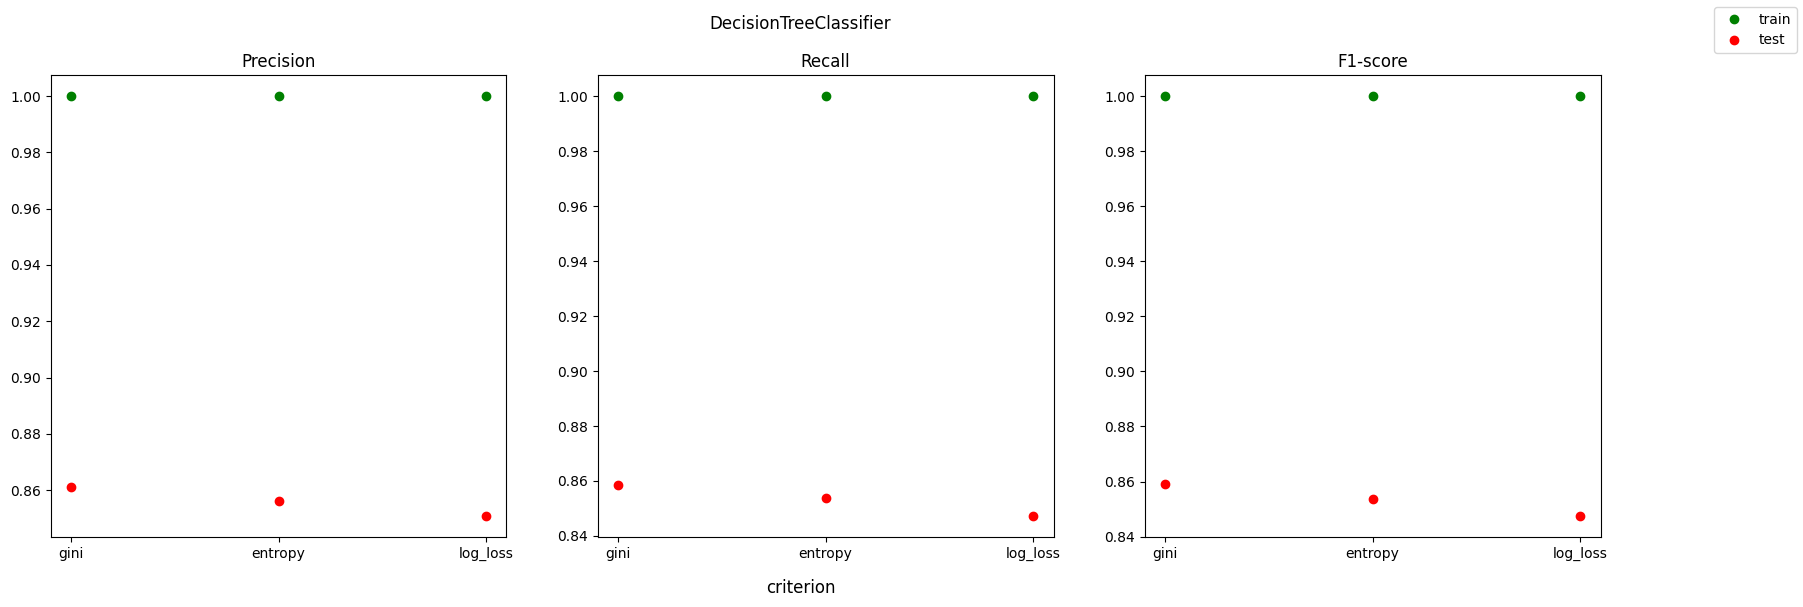

In [66]:
t_mtrx = ['Precision', 'Recall', 'F1-score']

t_arr = ['gini', 'entropy', 'log_loss']

t_prec_tr = [0, 0, 0]
t_prec_ts = [0, 0, 0]

t_rec_tr = [0, 0, 0]
t_rec_ts = [0, 0, 0]

t_f1_tr = [0, 0, 0]
t_f1_ts = [0, 0, 0]


for i in range(3):

  tr = DecisionTreeClassifier(criterion=t_arr[i])
  tr.fit(train_X, train_y)

  t_pred_tr = tr.predict(train_X)
  t_pred_ts = tr.predict(test_X)

  t_prec_tr[i] = precision_score(y_pred=t_pred_tr, y_true=train_y, average='macro')
  t_prec_ts[i] = precision_score(y_pred=t_pred_ts, y_true=test_y, average='macro')

  t_rec_tr[i] = recall_score(y_pred=t_pred_tr, y_true=train_y, average='macro')
  t_rec_ts[i] = recall_score(y_pred=t_pred_ts, y_true=test_y, average='macro')

  t_f1_tr[i] = f1_score(y_pred=t_pred_tr, y_true=train_y, average='macro')
  t_f1_ts[i] = f1_score(y_pred=t_pred_ts, y_true=test_y, average='macro')


fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].set_title(t_mtrx[0])
ax[0].plot(t_arr, t_prec_tr, 'go')
ax[0].plot(t_arr, t_prec_ts, 'ro')

ax[1].set_title(t_mtrx[1])
ax[1].plot(t_arr, t_rec_tr, 'go')
ax[1].plot(t_arr, t_rec_ts, 'ro')

ax[2].set_title(t_mtrx[2])
ax[2].plot(t_arr, t_f1_tr, 'go')
ax[2].plot(t_arr, t_f1_ts, 'ro')

fig.suptitle('DecisionTreeClassifier')
fig.supxlabel('criterion')
fig.legend(['train', 'test'])
plt.show()

***
⚡ Заметим, что оптимальным значением гиперпараметра является `criterion='gini'`.
***

#### 💡 Метод опорных векторов

***
`C: float, default=1.0`

Параметр регуляризации. Сила регуляризации обратно пропорциональна `C`. Должна быть строго положительной.
***

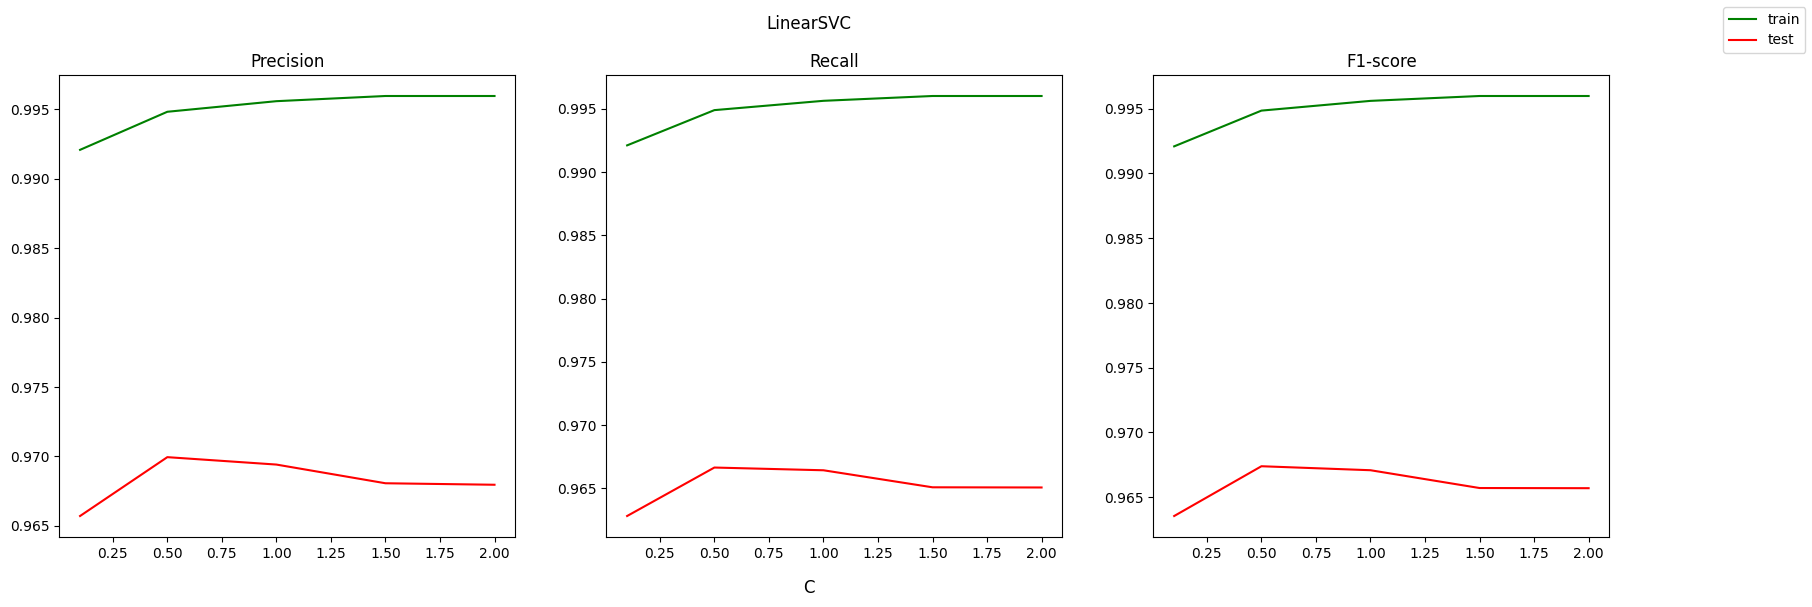

In [67]:
s_mtrx = ['Precision', 'Recall', 'F1-score']

cc_arr = [0.1, 0.5, 1, 1.5, 2]

s_prec_tr = [0, 0, 0, 0, 0]
s_prec_ts = [0, 0, 0, 0, 0]

s_rec_tr = [0, 0, 0, 0, 0]
s_rec_ts = [0, 0, 0, 0, 0]

s_f1_tr = [0, 0, 0, 0, 0]
s_f1_ts = [0, 0, 0, 0, 0]


for i in range(5):

  s = LinearSVC(C=cc_arr[i])
  s.fit(train_X, train_y)

  s_pred_tr = s.predict(train_X)
  s_pred_ts = s.predict(test_X)

  s_prec_tr[i] = precision_score(y_pred=s_pred_tr, y_true=train_y, average='macro')
  s_prec_ts[i] = precision_score(y_pred=s_pred_ts, y_true=test_y, average='macro')

  s_rec_tr[i] = recall_score(y_pred=s_pred_tr, y_true=train_y, average='macro')
  s_rec_ts[i] = recall_score(y_pred=s_pred_ts, y_true=test_y, average='macro')

  s_f1_tr[i] = f1_score(y_pred=s_pred_tr, y_true=train_y, average='macro')
  s_f1_ts[i] = f1_score(y_pred=s_pred_ts, y_true=test_y, average='macro')


fig, ax = plt.subplots(1, 3, figsize=(20, 6))

ax[0].set_title(s_mtrx[0])
ax[0].plot(cc_arr, s_prec_tr, 'g')
ax[0].plot(cc_arr, s_prec_ts, 'r')

ax[1].set_title(s_mtrx[1])
ax[1].plot(cc_arr, s_rec_tr, 'g')
ax[1].plot(cc_arr, s_rec_ts, 'r')

ax[2].set_title(s_mtrx[2])
ax[2].plot(cc_arr, s_f1_tr, 'g')
ax[2].plot(cc_arr, s_f1_ts, 'r')

fig.suptitle('LinearSVC')
fig.supxlabel('C')
fig.legend(['train', 'test'])
plt.show()


***
⚡ Заметим, что оптимальным значением гиперпараметра является `C=0.5`.
***

### 💡Сравнения моделей с лучшими гиперпараметрами

In [68]:
# основная модель обучения -- логистическая регрессия

lr_upd = LogisticRegression(C=1.5)

# модели для сравнения полученных результатов
k_upd = KNeighborsClassifier(n_neighbors=10)
t_upd = DecisionTreeClassifier(criterion='gini')
s_upd = LinearSVC(C=0.5)

lr_upd.fit(train_X, train_y)
k_upd.fit(train_X, train_y)
t_upd.fit(train_X, train_y)
s_upd.fit(train_X, train_y)

lr_pr_upd = lr_upd.predict(test_X)
k_pr_upd = k_upd.predict(test_X)
t_pr_upd = t_upd.predict(test_X)
s_pr_upd = s_upd.predict(test_X)


models_list = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'LinearSVC']

print('\u001b[36;1m ', models_list[0], '  \u001b[0m')
print(classification_report(test_y, lr_pr_upd, target_names=target_names))
print('\u001b[36;1m ', models_list[1], ' \u001b[0m')
print(classification_report(test_y, k_pr_upd, target_names=target_names))
print('\u001b[36;1m ', models_list[2], ' \u001b[0m')
print(classification_report(test_y, t_pr_upd, target_names=target_names))
print('\u001b[36;1m ', models_list[3], ' \u001b[0m')
print(classification_report(test_y, s_pr_upd, target_names=target_names))

  LogisticRegression   
                    precision    recall  f1-score   support

           Walking       0.95      0.99      0.97       496
  Walking Upstairs       0.97      0.95      0.96       471
Walking Downstairs       0.99      0.97      0.98       420
           Sitting       0.97      0.87      0.92       491
          Standing       0.90      0.98      0.94       532
            Laying       1.00      1.00      1.00       537

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947

  KNeighborsClassifier  
                    precision    recall  f1-score   support

           Walking       0.85      0.98      0.91       496
  Walking Upstairs       0.91      0.92      0.91       471
Walking Downstairs       0.96      0.78      0.86       420
           Sitting       0.89      0.83      0.86       491
          Standing       0.86      0.91      0.

***
⚡ Заметим, что результаты действительно стали точнее для моделей ` LogisticRegression`, `KNeighborsClassifier` и ` LinearSVC`.
***

В дополнение, вновь визуализируем полученные значения с помощью матрицы ошибок.
***

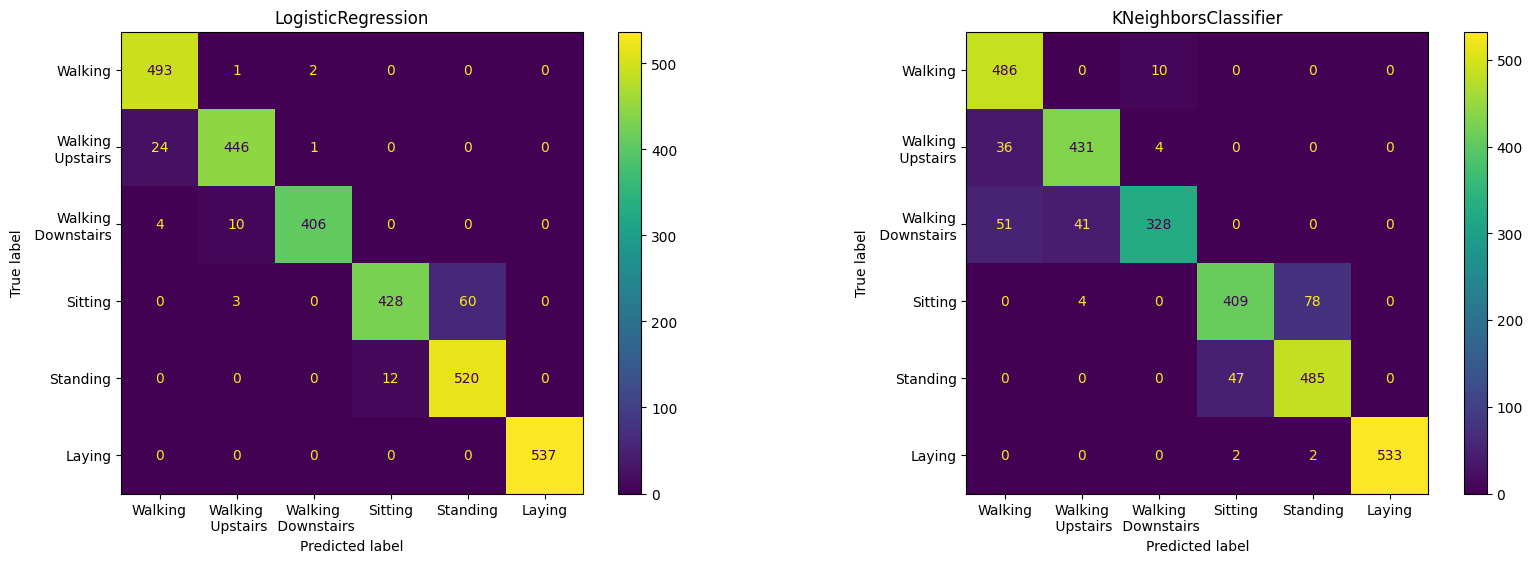

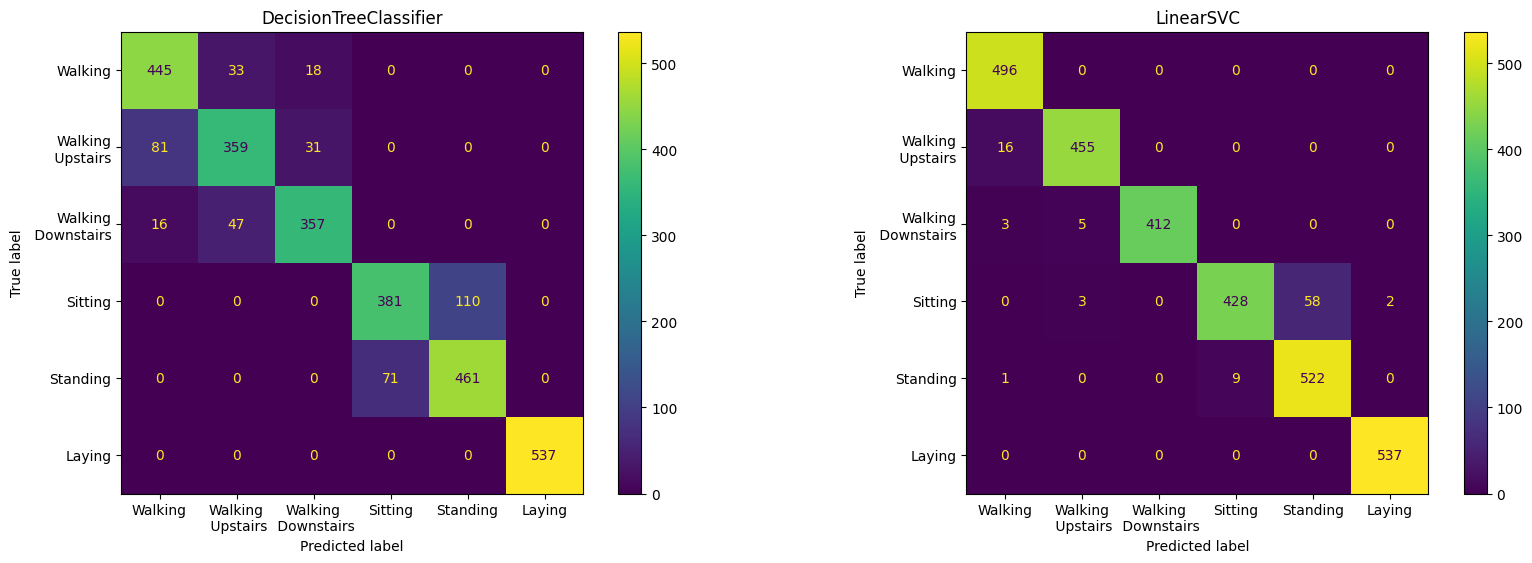

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(20, 6))

for i in range(2):
  ax[i].set_title(models_list[i])


ConfusionMatrixDisplay(confusion_matrix=mtrx.confusion_matrix(test_y, lr_pr_upd), display_labels=target_names_up,).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=mtrx.confusion_matrix(test_y, k_pr_upd), display_labels=target_names_up,).plot(ax=ax[1])


plt.show()

fig, ax = plt.subplots(1, 2, figsize=(20, 6))

for i in range(2):
  ax[i].set_title(models_list[i + 2])


ConfusionMatrixDisplay(confusion_matrix=mtrx.confusion_matrix(test_y, t_pr_upd), display_labels=target_names_up,).plot(ax=ax[0])

ConfusionMatrixDisplay(confusion_matrix=mtrx.confusion_matrix(test_y, s_pr_upd), display_labels=target_names_up,).plot(ax=ax[1])


plt.show()

## В чем разница между показателями `precision` и `recall`? Что такое показатель `F1`?

***
**💡Показатели `precision`, `recall`, `f1-score` и `support`**

*   `precision`: показывает, какую долю из всех предсказанных положительных классов составляют истинные положительные примеры. Это важно, когда важно минимизировать количество ложноположительных результатов;

*   `recall`: показывает, какую долю из всех истинных положительных классов модель смогла правильно идентифицировать. Это важно, когда необходимо минимизировать количество ложноотрицательных результатов;

*   `f1-score`: является гармоническим средним между `precision` и `recall`. Он служит для оценки модели, учитывая как ложноположительные, так и ложноотрицательные результаты. Это особенно полезно в случаях, когда необходим баланс между `precision` и `recall`. Рассчитывается по формуле:
$$ \text{f1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

*   `support`: указывает на количество истинных экземпляров каждого класса в тестовом наборе данных. Это значение помогает понять, как много примеров каждого класса было представлено в данных, и играет важную роль в интерпретации других метрик, таких как `precision`, `recall` и `f1-score`.

***
**💡Разница между показателями `precision` и `recall`**

`Precision` акцентирует внимание на точности выявления положительных объектов.
`Recall` фокусируется на способности модели находить все положительные объекты.
***

## Что такое гиперпараметры модели машинного обучения (МО)?

💡 ***Гиперпараметры модели машинного обучения*** $-$ это настраиваемые параметры, позволяющие управлять процессом обучения модели. Гиперпараметры настраиваются вручную перед обучением модели. Они отличаются от параметров – внутренних параметров, получаемых автоматически в процессе обучения и не настраиваемых разработчиком.




## Вывод

В ходе выполнения лабораторной работы были изучены такие модели машинного обучения как `LogisticRegression`, `KNeighborsClassifier`, `DecisionTreeClassifier` и `LinearSVC`. Изучены гиперпараметры данных моделей. Для каждой из моделей проведено сравнение результатов при изменении гиперпараметра.

Наилучшие результаты для данной задачи классификации показали модели на основе Метода опорных векторов и Логистической регрессии. Они отличаются гибкостью и легкостью в подборе гиперпараметров. Самым сложным в применении оказался метод, основанный на Дереве принятий решений, результаты для него самые низкие по сравнению с другими моделями в этой работе.